## Simulación de procesos AR y MA

## Cargar paquetes

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (10,8)

## Simulación de Proceso AR(2)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html

$ y_t = \phi_1 y_{t-1} + ... + \phi_p y_{t-p} + \theta_0 \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t-q}  $ <br>
Y la representación con el operador de retardo $B$ es: <br>
$ (1 -  \phi_1 B - ... - \phi_p B^p) y_t  =(\theta_0  + \theta_1 B + ... + \theta_q B^q) \epsilon_t$ 

Nuestro modelo será: <br>
$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.1\epsilon(t) $

In [4]:
ar2 = np.array([1, 0.33, 0.5]) # Suma retardo cero
ma2 = np.array([0.1, 0, 0])

In [5]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

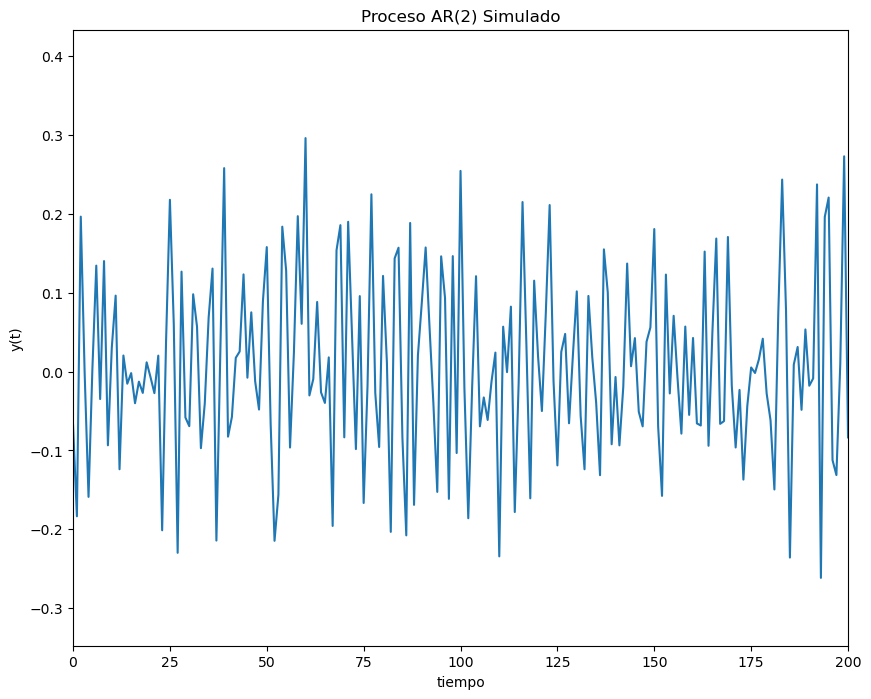

In [6]:
plt.plot(AR2_process)
plt.title('Proceso AR(2) Simulado')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.show()

### La función de autocorrelación

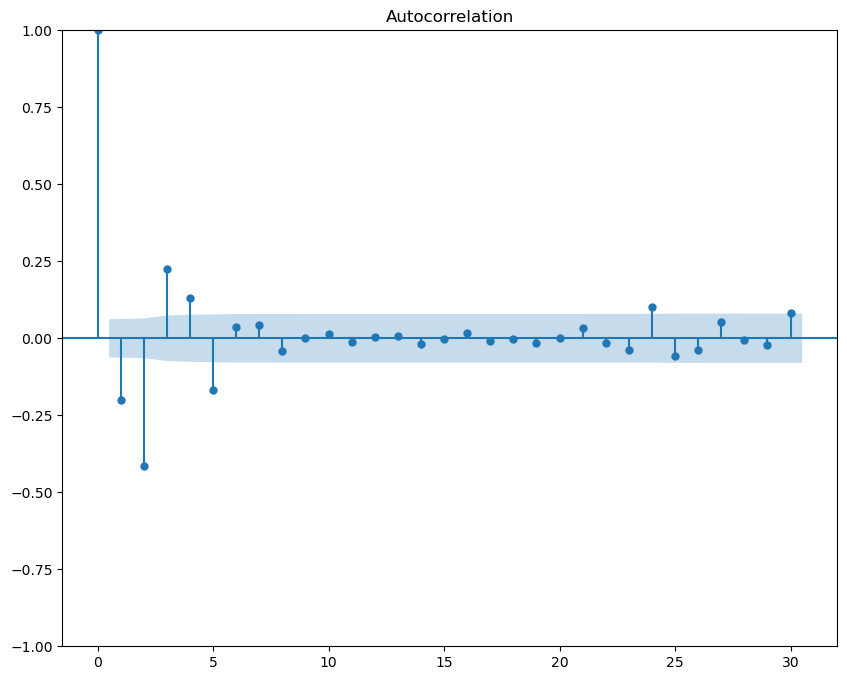

In [7]:
plot_acf(AR2_process);

### La función de autocorrelación parcial

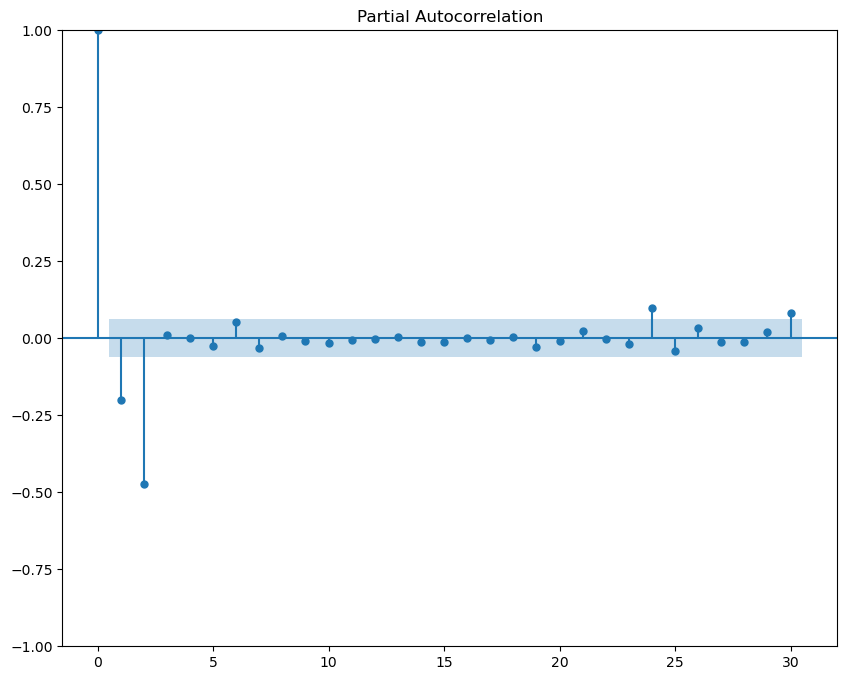

In [8]:
plot_pacf(AR2_process);

## El cálculo de los coeficientes del modelo

In [9]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')
rho, sigma

(array([-0.29555457, -0.4742846 ]), 0.10082088193293051)

### Simular un proceso AR(3)

$ y_t = 0.33 y_{t-1} + 0.5 y_{t-2} + 0.07 y_{t-3} + 0.2 \epsilon_t $

In [10]:
ar3 = np.array([1, 0.33, 0.5, 0.07]) # Suma retardo cero
ma3 = np.array([0.2, 0, 0, 0])

In [11]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)

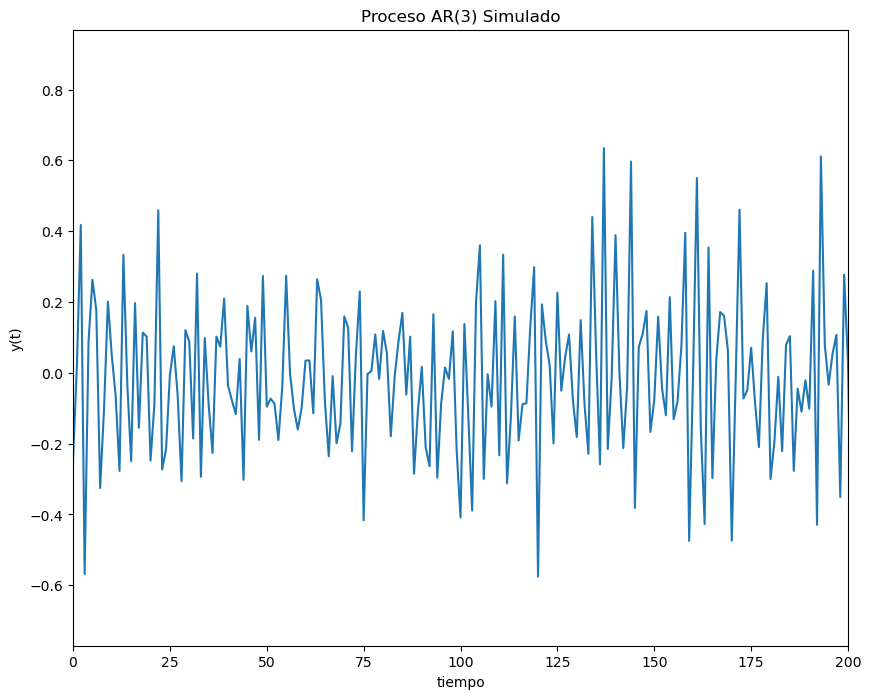

In [12]:
plt.plot(AR3_process)
plt.title('Proceso AR(3) Simulado')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.show()

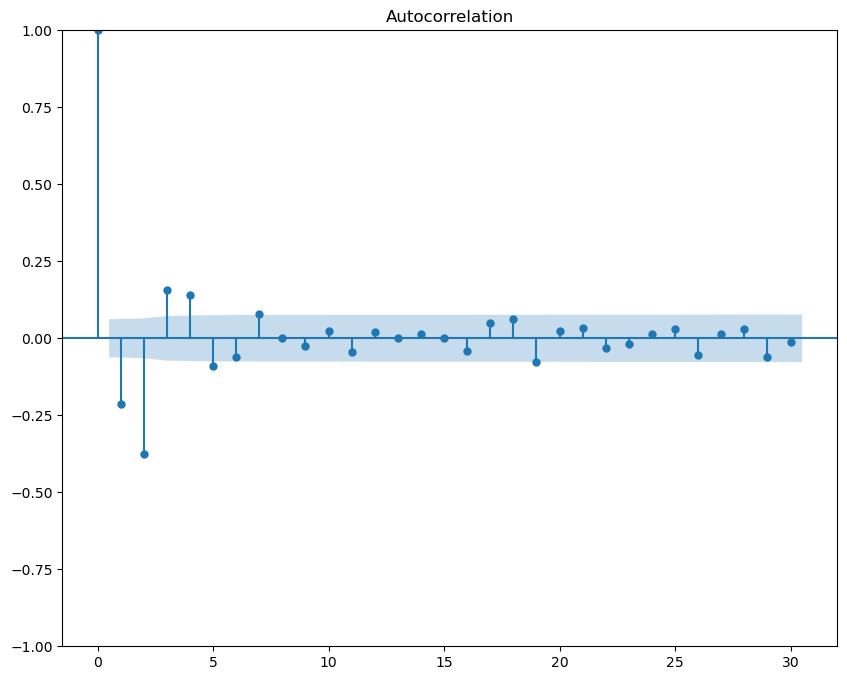

In [15]:
plot_acf(AR3_process);

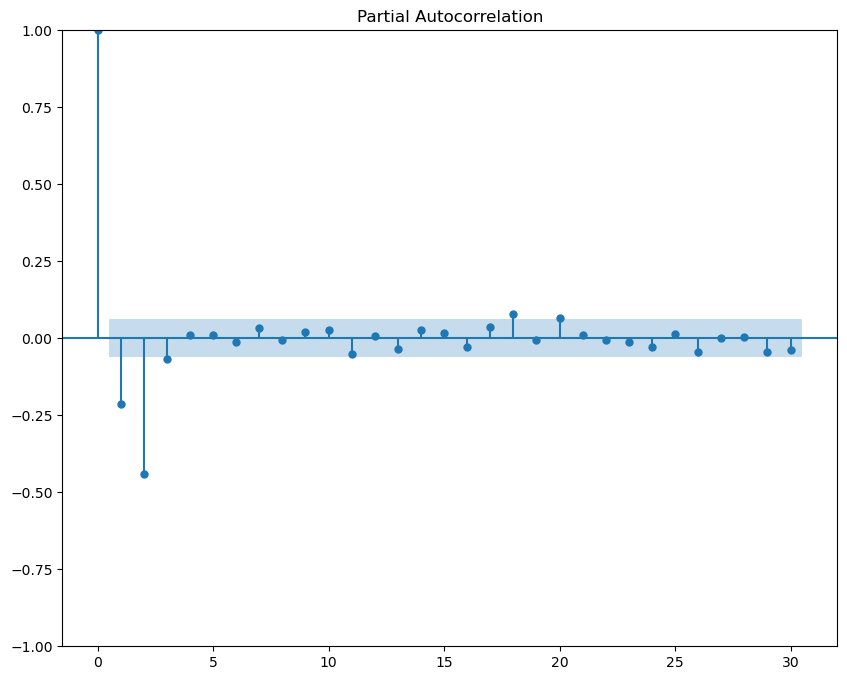

In [16]:
plot_pacf(AR3_process);

In [17]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')
rho, sigma

(array([-0.33705843, -0.46157969, -0.06750126]), 0.20201704350775368)

## Ejercicio en clase

In [18]:
url = "https://raw.githubusercontent.com/Chefi/Modelos-de-Control-de-Producci-n/refs/heads/main/jj.csv"

In [19]:
data = pd.read_csv(url, index_col="date", parse_dates=True)

In [20]:
data.head()

,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


In [21]:
data.tail()

,data
date,
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


In [22]:
data.describe()

,data
count,84.000000
mean,4.799762
std,4.309991
min,0.440000
25%,1.247500
50%,3.510000
75%,7.132500
max,16.200000


In [23]:
data.index.freq

In [24]:
pd.date_range(start="1960-01-01", end="1980-10-01", freq="QS")

DatetimeIndex(['1960-01-01', '1960-04-01', '1960-07-01', '1960-10-01',
               '1961-01-01', '1961-04-01', '1961-07-01', '1961-10-01',
               '1962-01-01', '1962-04-01', '1962-07-01', '1962-10-01',
               '1963-01-01', '1963-04-01', '1963-07-01', '1963-10-01',
               '1964-01-01', '1964-04-01', '1964-07-01', '1964-10-01',
               '1965-01-01', '1965-04-01', '1965-07-01', '1965-10-01',
               '1966-01-01', '1966-04-01', '1966-07-01', '1966-10-01',
               '1967-01-01', '1967-04-01', '1967-07-01', '1967-10-01',
               '1968-01-01', '1968-04-01', '1968-07-01', '1968-10-01',
               '1969-01-01', '1969-04-01', '1969-07-01', '1969-10-01',
               '1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
               '1971-01-01', '1971-04-01', '1971-07-01', '1971-10-01',
               '1972-01-01', '1972-04-01', '1972-07-01', '1972-10-01',
               '1973-01-01', '1973-04-01', '1973-07-01', '1973-10-01',
      

In [25]:
data.index = pd.date_range(start="1960-01-01", end="1980-10-01", freq="QS")

In [26]:
data.index

DatetimeIndex(['1960-01-01', '1960-04-01', '1960-07-01', '1960-10-01',
               '1961-01-01', '1961-04-01', '1961-07-01', '1961-10-01',
               '1962-01-01', '1962-04-01', '1962-07-01', '1962-10-01',
               '1963-01-01', '1963-04-01', '1963-07-01', '1963-10-01',
               '1964-01-01', '1964-04-01', '1964-07-01', '1964-10-01',
               '1965-01-01', '1965-04-01', '1965-07-01', '1965-10-01',
               '1966-01-01', '1966-04-01', '1966-07-01', '1966-10-01',
               '1967-01-01', '1967-04-01', '1967-07-01', '1967-10-01',
               '1968-01-01', '1968-04-01', '1968-07-01', '1968-10-01',
               '1969-01-01', '1969-04-01', '1969-07-01', '1969-10-01',
               '1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
               '1971-01-01', '1971-04-01', '1971-07-01', '1971-10-01',
               '1972-01-01', '1972-04-01', '1972-07-01', '1972-10-01',
               '1973-01-01', '1973-04-01', '1973-07-01', '1973-10-01',
      

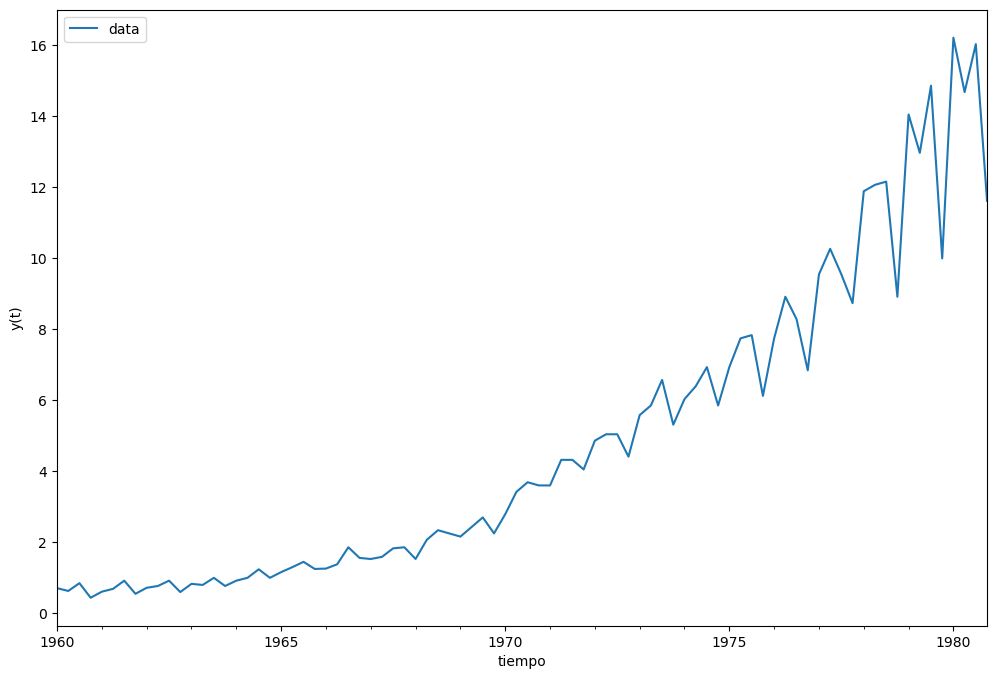

In [27]:
data['data'].iloc[:].plot(figsize=(12,8))
plt.legend(loc='upper left')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
#plt.xlim(0,200)
plt.show()

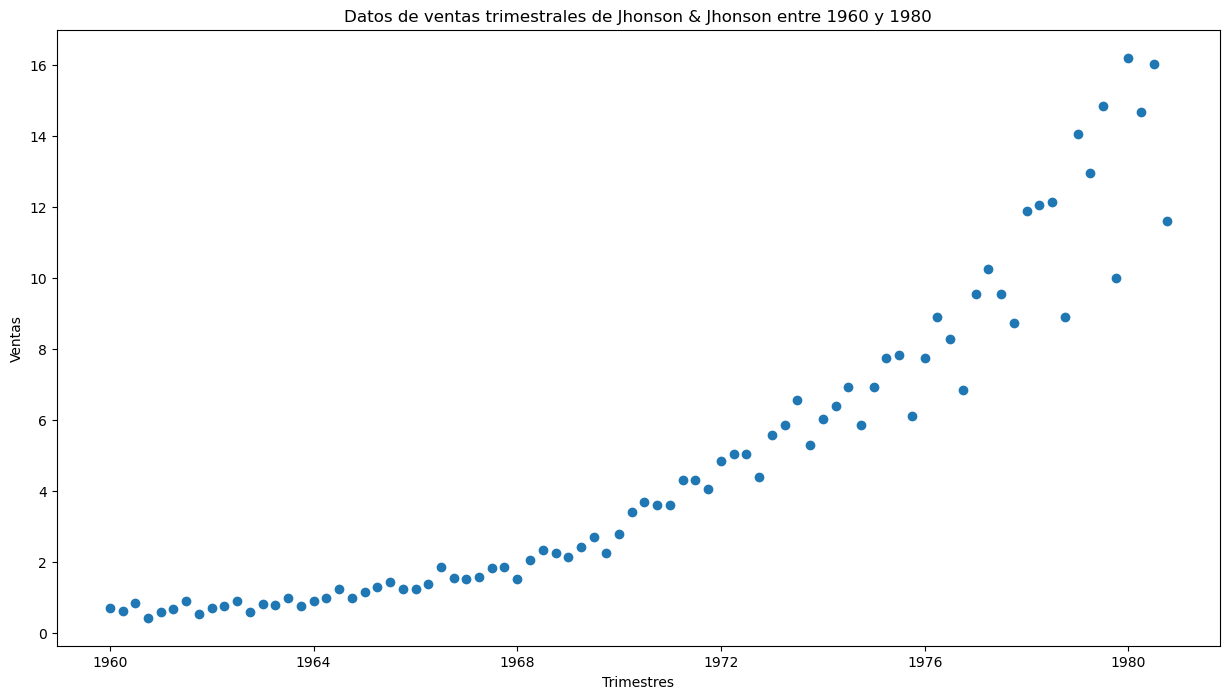

In [28]:
plt.figure(figsize=[15,8])
plt.scatter(data.index.values, data['data'])
plt.title('Datos de ventas trimestrales de Jhonson & Jhonson entre 1960 y 1980')
plt.xlabel('Trimestres')
plt.ylabel('Ventas')
plt.show()

## Volver estacionaria la serie

In [29]:
data['logdata'] = np.log(data['data'])
data['difflogdata'] = data['logdata'].diff()
data.head()

,data,logdata,difflogdata
1960-01-01,0.71,-0.342490,NaN
1960-04-01,0.63,-0.462035,-0.119545
1960-07-01,0.85,-0.162519,0.299517
1960-10-01,0.44,-0.820981,-0.658462
1961-01-01,0.61,-0.494296,0.326684


In [30]:
data = data.dropna()
data.head()

,data,logdata,difflogdata
1960-04-01,0.63,-0.462035,-0.119545
1960-07-01,0.85,-0.162519,0.299517
1960-10-01,0.44,-0.820981,-0.658462
1961-01-01,0.61,-0.494296,0.326684
1961-04-01,0.69,-0.371064,0.123233


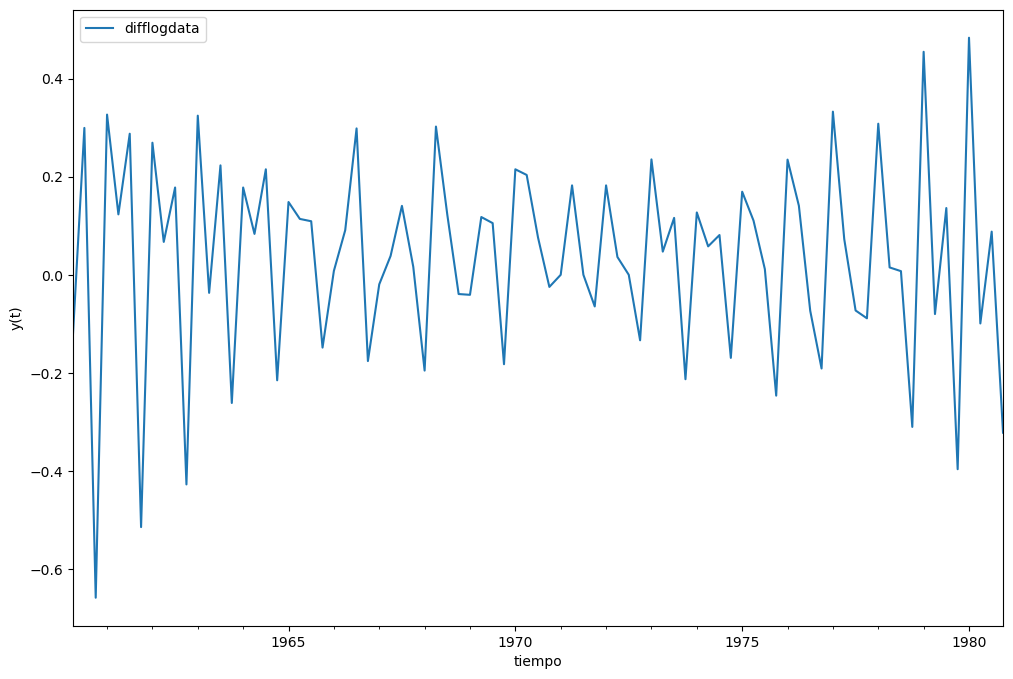

In [31]:
data['difflogdata'].iloc[:].plot(figsize=(12,8))
plt.legend(loc='upper left')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
#plt.xlim(0,200)
plt.show()

## Prueba de estacionalidad

In [32]:
adfuller(data['difflogdata']) # Ho es que la serie no es estacionaria

(-4.317043945811826,
 0.0004149731404440838,
 5,
 77,
 {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 -140.7202208245293)

### Rechaza en este caso la Ho de que no es estacionaria

### Por lo tanto, la serie log diferenciada es estacionaria

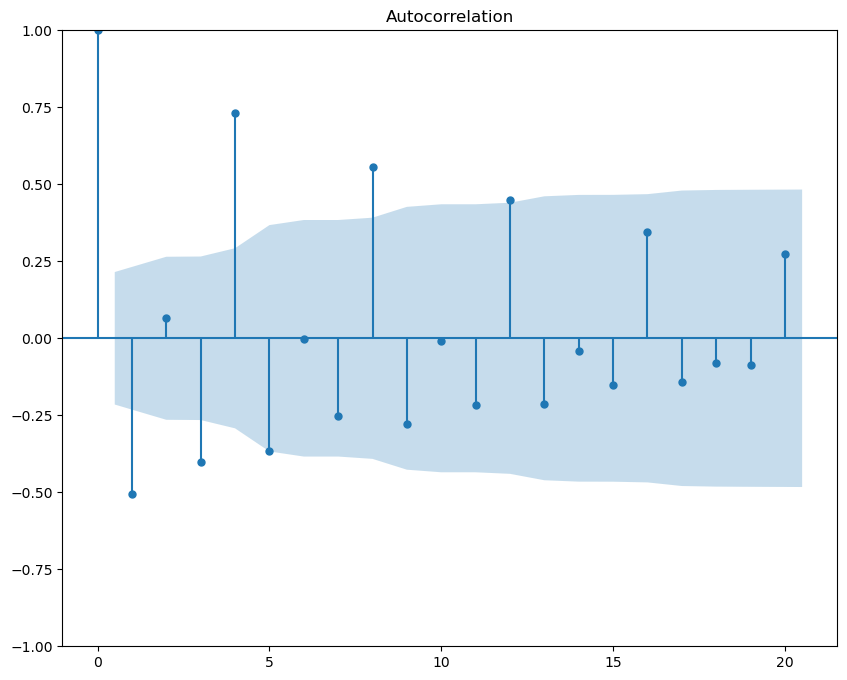

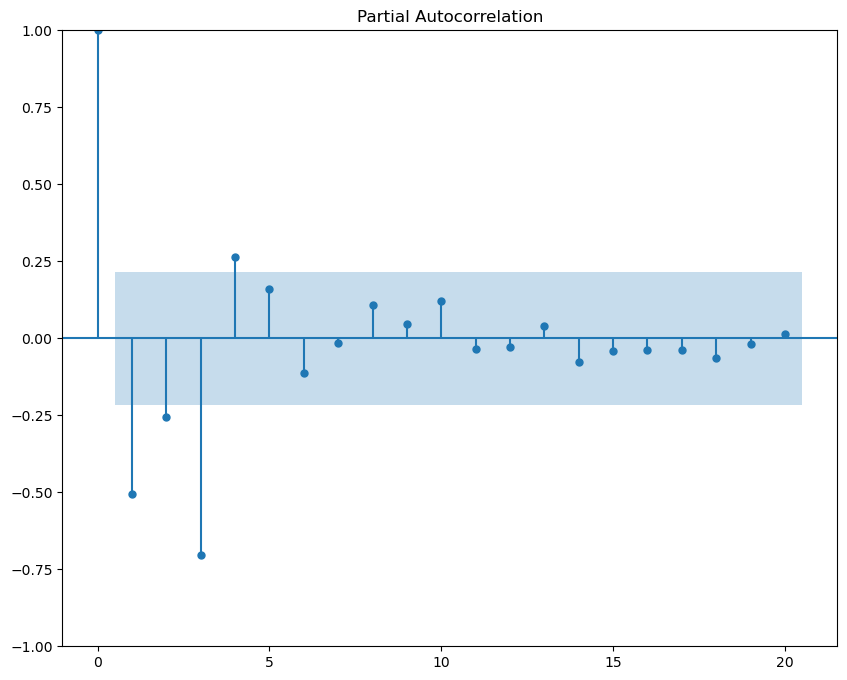

In [33]:
plot_acf(data['difflogdata']);
plot_pacf(data['difflogdata']);

### Tratamos un AR(4)

In [34]:
rho, sigma = yule_walker(data['difflogdata'], 4)
rho, sigma

(array([-0.63642644, -0.5364386 , -0.50578018,  0.27991345]),
 0.11132979178317175)

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['difflogdata'], order=(4, 0, 0))
model_fit = model.fit()

C:\Users\ftorr\anaconda3\envs\AmbienteModelos\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Pronósticos hacia el futuro

In [36]:
forecast = model_fit.get_forecast(steps=len(data))

In [37]:
forecast.predicted_mean

1981-01-01    0.465645
1981-04-01   -0.103216
1981-07-01    0.112767
1981-10-01   -0.293606
1982-01-01    0.428622
                ...   
2000-07-01    0.153974
2000-10-01   -0.085141
2001-01-01    0.164098
2001-04-01   -0.077874
2001-07-01    0.150685
Freq: QS-JAN, Name: predicted_mean, Length: 83, dtype: float64

### Los residuos del modelo ajustado:

In [38]:
model_fit.resid

1960-04-01   -0.157962
1960-07-01    0.142077
1960-10-01   -0.495886
1961-01-01   -0.280069
1961-04-01    0.063298
                ...   
1979-10-01   -0.082793
1980-01-01    0.016281
1980-04-01   -0.004743
1980-07-01   -0.071062
1980-10-01   -0.010789
Freq: QS-JAN, Length: 83, dtype: float64

### Los datos ajustados según el modelo

In [39]:
data["Ajustados"] = -model_fit.resid+data['difflogdata']
data.head()

,data,logdata,difflogdata,Ajustados
1960-04-01,0.63,-0.462035,-0.119545,0.038417
1960-07-01,0.85,-0.162519,0.299517,0.157440
1960-10-01,0.44,-0.820981,-0.658462,-0.162576
1961-01-01,0.61,-0.494296,0.326684,0.606753
1961-04-01,0.69,-0.371064,0.123233,0.059934


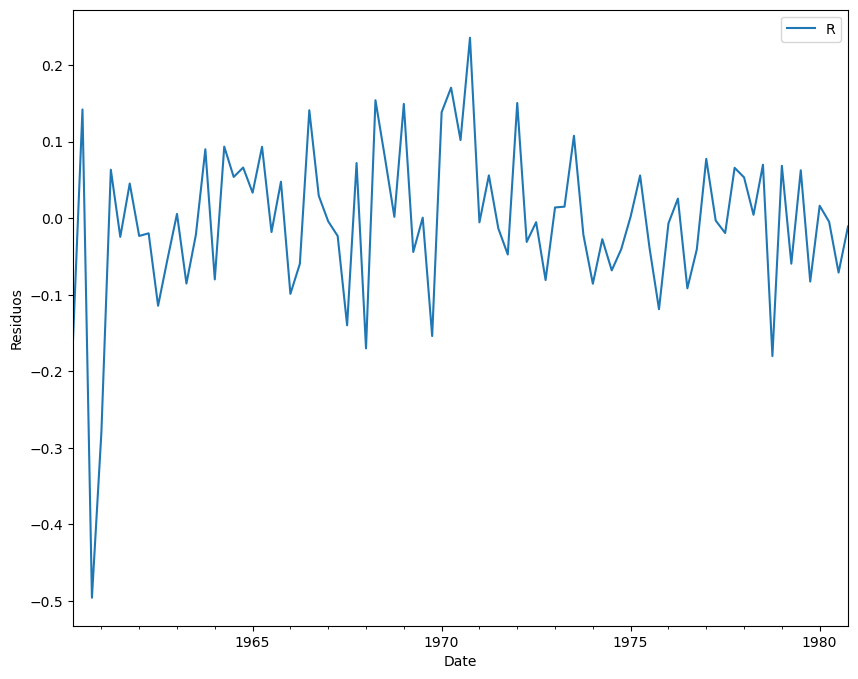

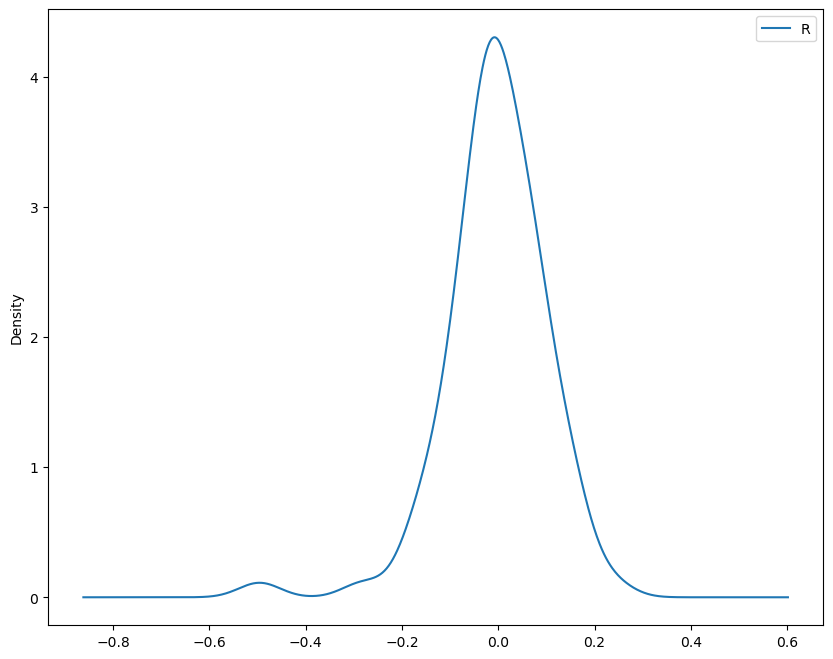

               0
count  83.000000
mean   -0.004451
std     0.104197
min    -0.495886
25%    -0.050367
50%    -0.004743
75%     0.062952
max     0.235801


In [42]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xlabel('Date')
plt.ylabel('Residuos')
plt.legend("Residuos")
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.legend("Residuos")
plt.show()
# summary stats of residuals
print(residuals.describe())

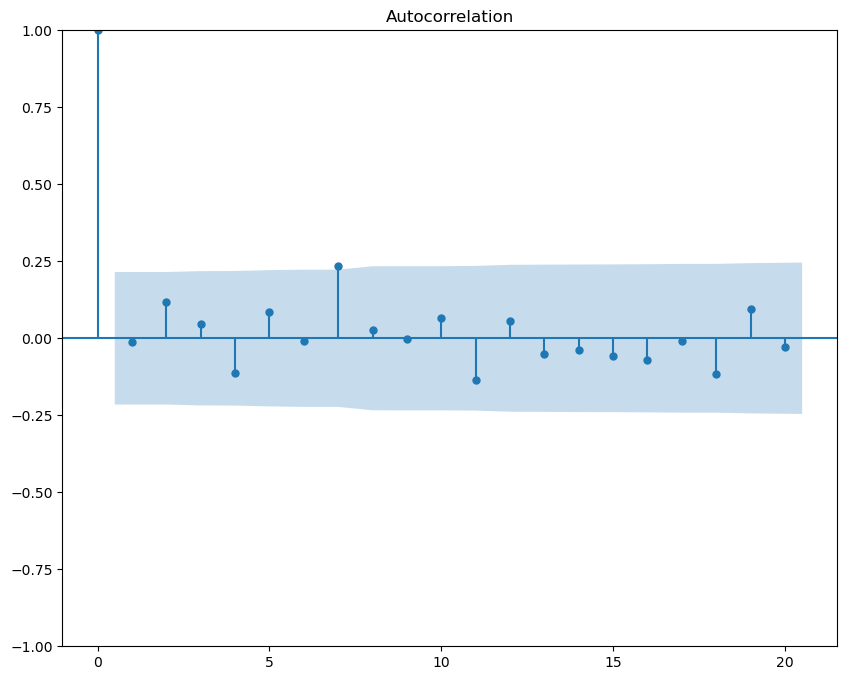

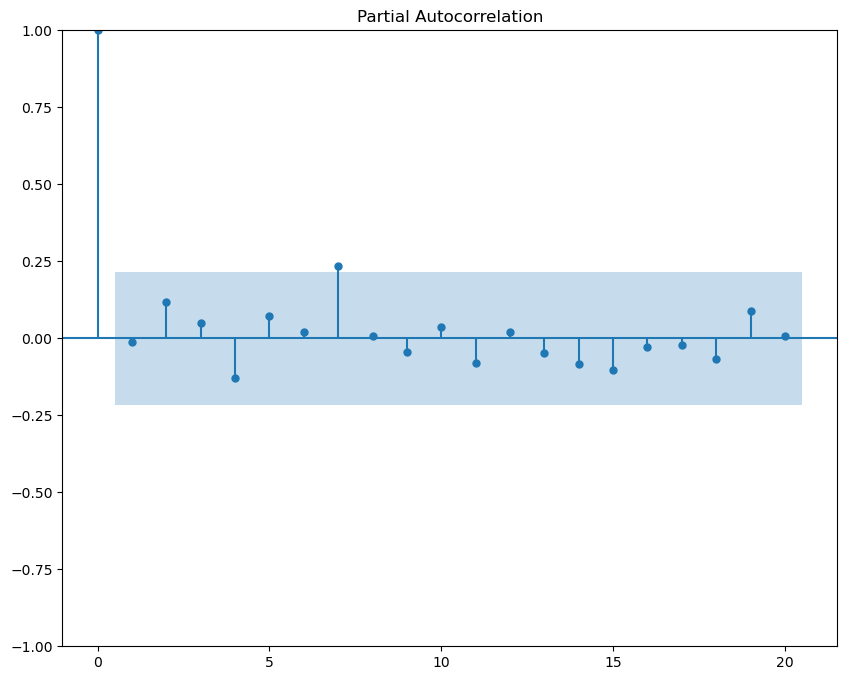

In [43]:
plot_acf(residuals);
plot_pacf(residuals);

### La Tabla de resumen del modelo AR(4) Ajustado a la data log diferencial

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            difflogdata   No. Observations:                   83
Model:                 ARIMA(4, 0, 0)   Log Likelihood                  80.624
Date:                Sat, 26 Oct 2024   AIC                           -149.248
Time:                        18:01:47   BIC                           -134.735
Sample:                    04-01-1960   HQIC                          -143.417
                         - 10-01-1980                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0384      0.004      9.590      0.000       0.031       0.046
ar.L1         -0.6839      0.113     -6.046      0.000      -0.906      -0.462
ar.L2         -0.6111      0.117     -5.214      0.000      -0.841      -0.381
ar.L3         -0.6232      0.126     -4.949      0.000      -0.870      -0.376
ar.L4          0.2816      0.127      2.210      0.027       0.032       0.531
sigma2         0.0078      0.001      6.539      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.86   Prob(JB):                         0.38
Heteroskedasticity (H):               0.51   Skew:                            -0.22
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
data.index

DatetimeIndex(['1960-04-01', '1960-07-01', '1960-10-01', '1961-01-01',
               '1961-04-01', '1961-07-01', '1961-10-01', '1962-01-01',
               '1962-04-01', '1962-07-01', '1962-10-01', '1963-01-01',
               '1963-04-01', '1963-07-01', '1963-10-01', '1964-01-01',
               '1964-04-01', '1964-07-01', '1964-10-01', '1965-01-01',
               '1965-04-01', '1965-07-01', '1965-10-01', '1966-01-01',
               '1966-04-01', '1966-07-01', '1966-10-01', '1967-01-01',
               '1967-04-01', '1967-07-01', '1967-10-01', '1968-01-01',
               '1968-04-01', '1968-07-01', '1968-10-01', '1969-01-01',
               '1969-04-01', '1969-07-01', '1969-10-01', '1970-01-01',
               '1970-04-01', '1970-07-01', '1970-10-01', '1971-01-01',
               '1971-04-01', '1971-07-01', '1971-10-01', '1972-01-01',
               '1972-04-01', '1972-07-01', '1972-10-01', '1973-01-01',
               '1973-04-01', '1973-07-01', '1973-10-01', '1974-01-01',
      

In [46]:
model.predict

<bound method Model.predict of <statsmodels.tsa.arima.model.ARIMA object at 0x0000022F8DACB750>>

### Datos log diferencial y datos ajustados un paso hacia adelante con AR(4)

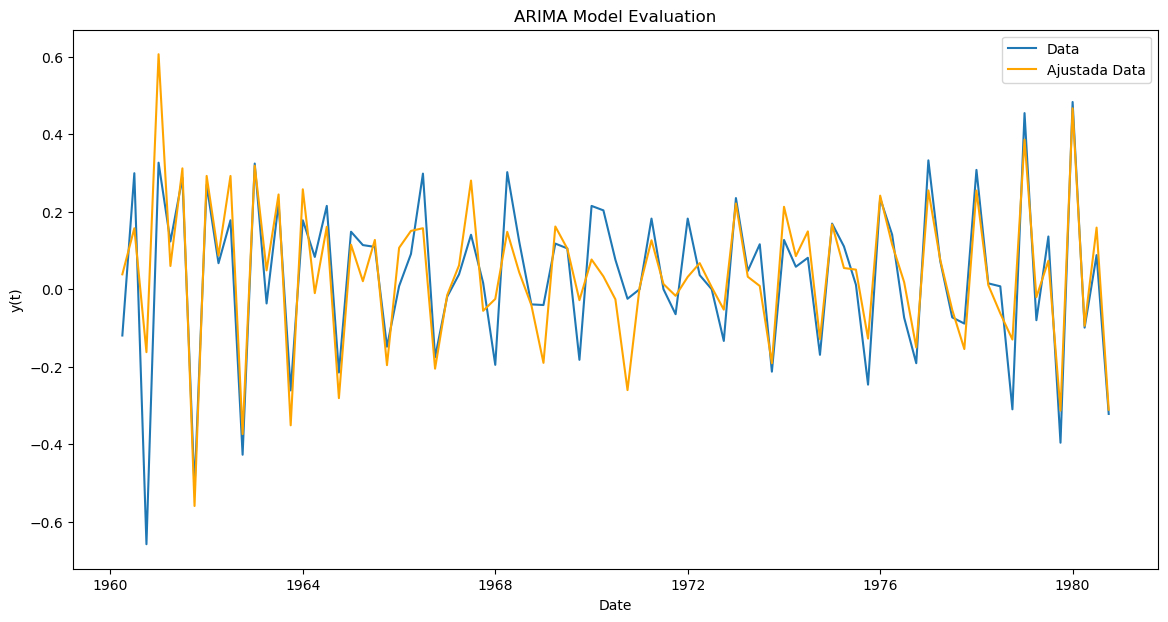

In [47]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(data['difflogdata'], label='Data')
plt.plot(data['Ajustados'], label='Ajustada Data', color='orange')
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Metodología Train y Test para datos log diferenciales

### Ajuste de un modelo AR(4,0,0)

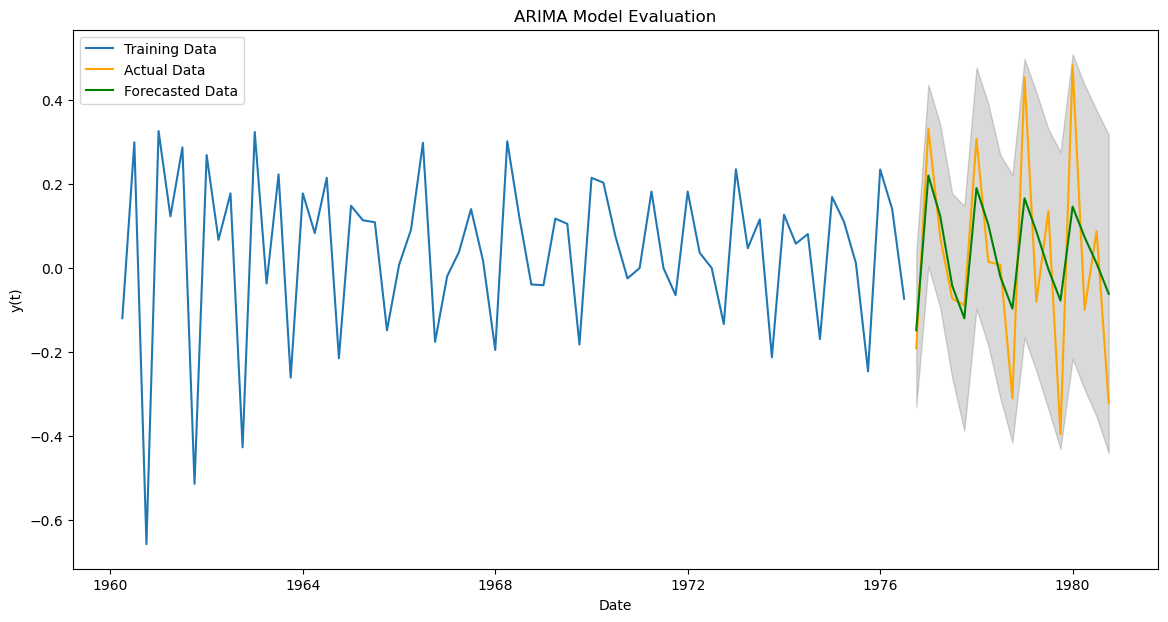

RMSE: 0.1775523254017546


In [48]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['difflogdata'], order=(4, 0, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['difflogdata'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['difflogdata'], label='Training Data')
plt.plot(test['difflogdata'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()

print('RMSE:', rmse)

### Ajuste del modelo AR(4,1,0) a la serie logdata

In [49]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['logdata'], order=(4, 1, 0))
model_fit = model.fit()

In [50]:
forecast = model_fit.get_forecast(steps=30)

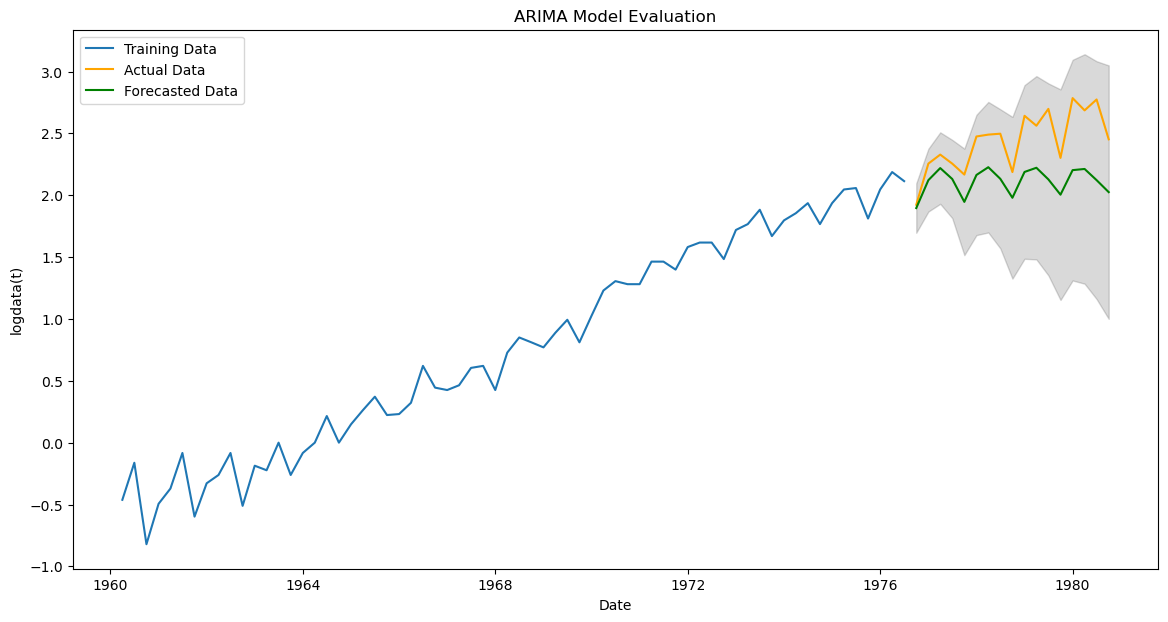

RMSE: 0.3711941926688517


In [52]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['logdata'], order=(4, 1, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['logdata'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['logdata'], label='Training Data')
plt.plot(test['logdata'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('logdata(t)')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [53]:
data

,data,logdata,difflogdata,Ajustados
1960-04-01,0.63,-0.462035,-0.119545,0.038417
1960-07-01,0.85,-0.162519,0.299517,0.157440
1960-10-01,0.44,-0.820981,-0.658462,-0.162576
1961-01-01,0.61,-0.494296,0.326684,0.606753
1961-04-01,0.69,-0.371064,0.123233,0.059934
...,...,...,...,...
1979-10-01,9.99,2.301585,-0.396415,-0.313623
1980-01-01,16.20,2.785011,0.483427,0.467145
1980-04-01,14.67,2.685805,-0.099207,-0.094463
1980-07-01,16.02,2.773838,0.088033,0.159096


In [54]:
test_forecast.summary_frame()

logdata,mean,mean_se,mean_ci_lower,mean_ci_upper
1976-10-01,1.896200,0.101965,1.696352,2.096047
1977-01-01,2.121775,0.129489,1.867981,2.375569
1977-04-01,2.219321,0.147412,1.930400,2.508243
1977-07-01,2.131348,0.161323,1.815161,2.447536
1977-10-01,1.946088,0.219660,1.515563,2.376613
1978-01-01,2.163739,0.248118,1.677436,2.650041
1978-04-01,2.226453,0.269150,1.698928,2.753977
1978-07-01,2.132620,0.286910,1.570286,2.694954
1978-10-01,1.979345,0.333508,1.325682,2.633008
1979-01-01,2.188148,0.358074,1.486336,2.889961


In [55]:
model_train_fit.params

ar.L1    -0.217216
ar.L2    -0.139076
ar.L3    -0.098335
ar.L4     0.774759
sigma2    0.010397
dtype: float64

In [56]:
model_train_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                logdata   No. Observations:                   66
Model:                 ARIMA(4, 1, 0)   Log Likelihood                  53.272
Date:                Sat, 26 Oct 2024   AIC                            -96.544
Time:                        18:09:51   BIC                            -85.672
Sample:                    04-01-1960   HQIC                           -92.255
                         - 07-01-1976                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2172      0.106     -2.040      0.041      -0.426      -0.009
ar.L2         -0.1391      0.084     -1.658      0.097      -0.303       0.025
ar.L3         -0.0983      0.090     -1.095      0.274      -0.274       0.078
ar.L4          0.7748      0.087      8.949      0.000       0.605       0.944
sigma2         0.0104      0.002      4.928      0.000       0.006       0.015
===================================================================================
Ljung-Box (L1) (Q):                   7.09   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.01   Prob(JB):                         0.98
Heteroskedasticity (H):               0.62   Skew:                             0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

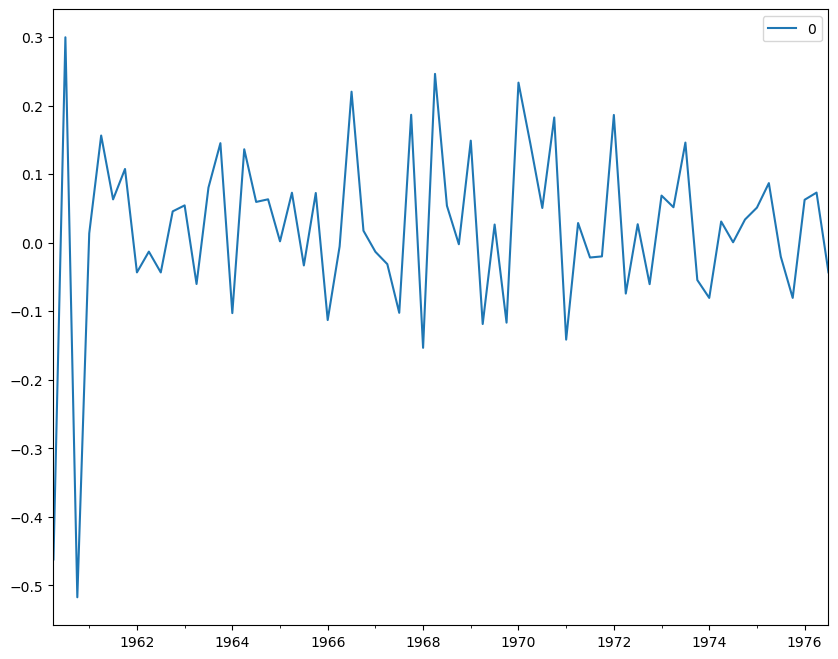

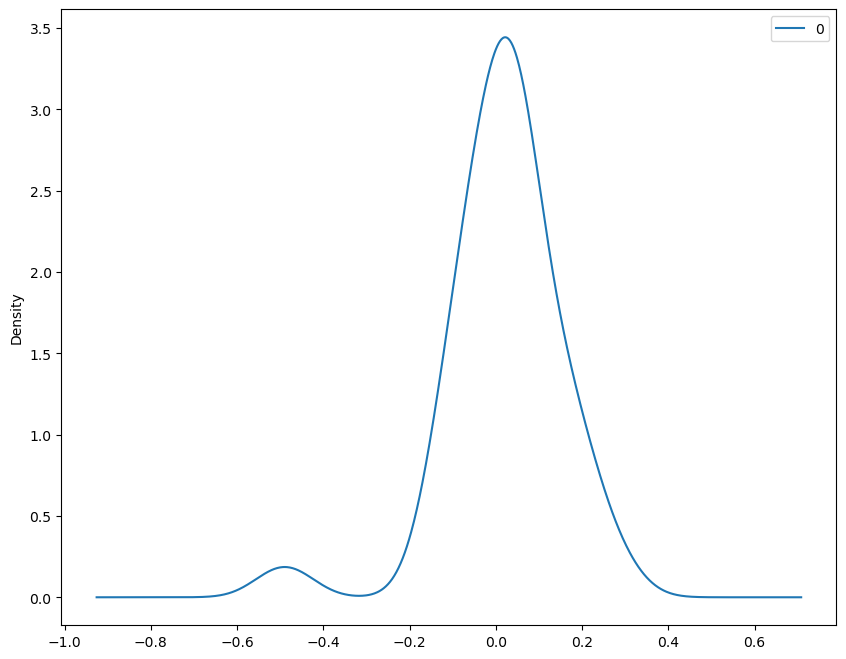

               0
count  66.000000
mean    0.018151
std     0.134091
min    -0.517207
25%    -0.043361
50%     0.027765
75%     0.072961
max     0.299517


In [57]:
residuals = pd.DataFrame(model_train_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

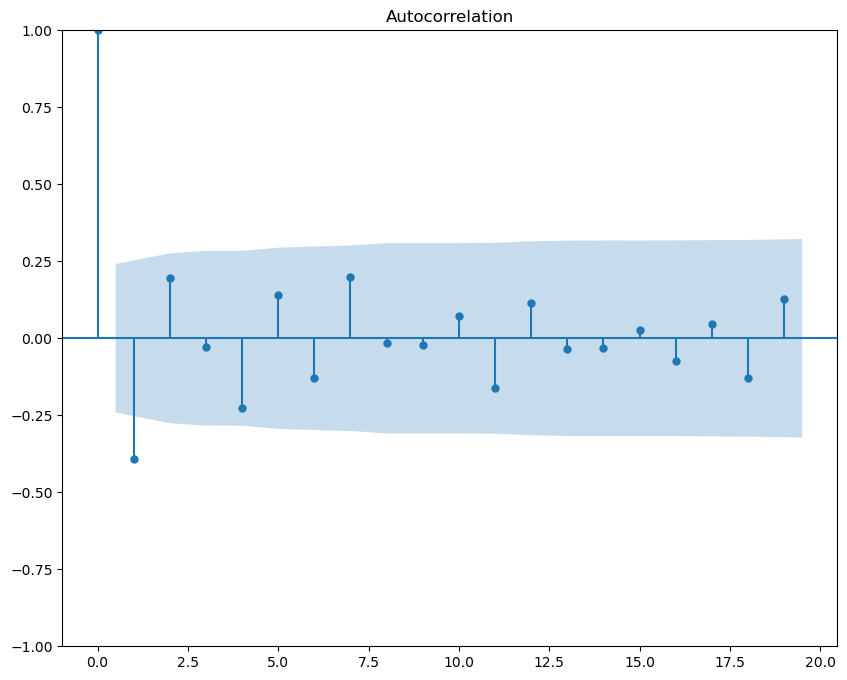

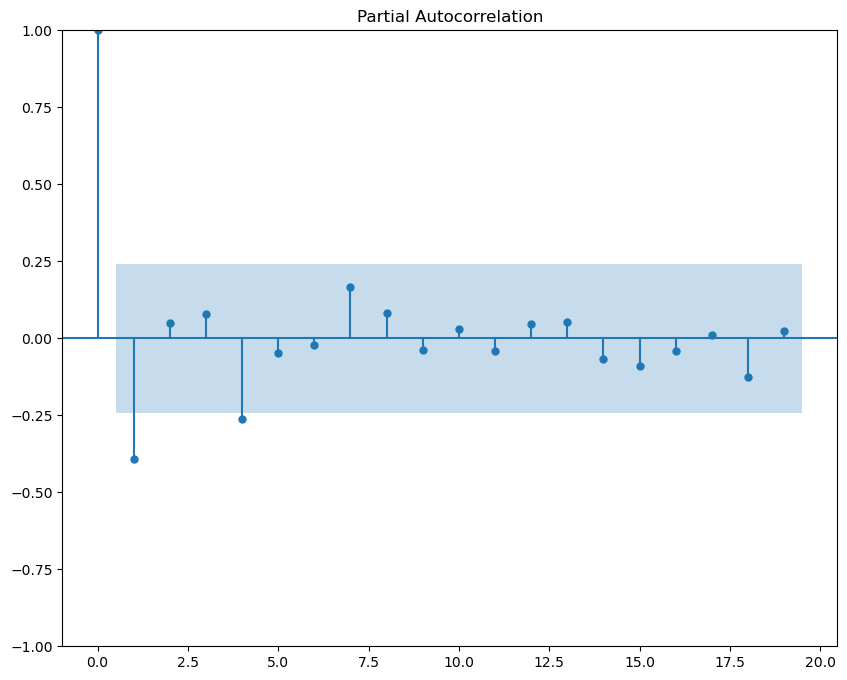

In [58]:
plot_acf(residuals);
plot_pacf(residuals);

In [59]:
test_forecast_series-test['logdata']

1976-10-01   -0.026588
1977-01-01   -0.133719
1977-04-01   -0.108931
1977-07-01   -0.124145
1977-10-01   -0.220677
1978-01-01   -0.311118
1978-04-01   -0.263442
1978-07-01   -0.364709
1978-10-01   -0.207829
1979-01-01   -0.453762
1979-04-01   -0.339942
1979-07-01   -0.570076
1979-10-01   -0.297224
1980-01-01   -0.582287
1980-04-01   -0.473570
1980-07-01   -0.651935
1980-10-01   -0.426903
Freq: QS-JAN, dtype: float64

## Simulación de Proceso MA(3)

In [65]:
ma3 = np.array([1, 0.33, 0.5, 0.66]) 
ar3 = np.array([0.1, 0, 0])

In [66]:
MA3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)

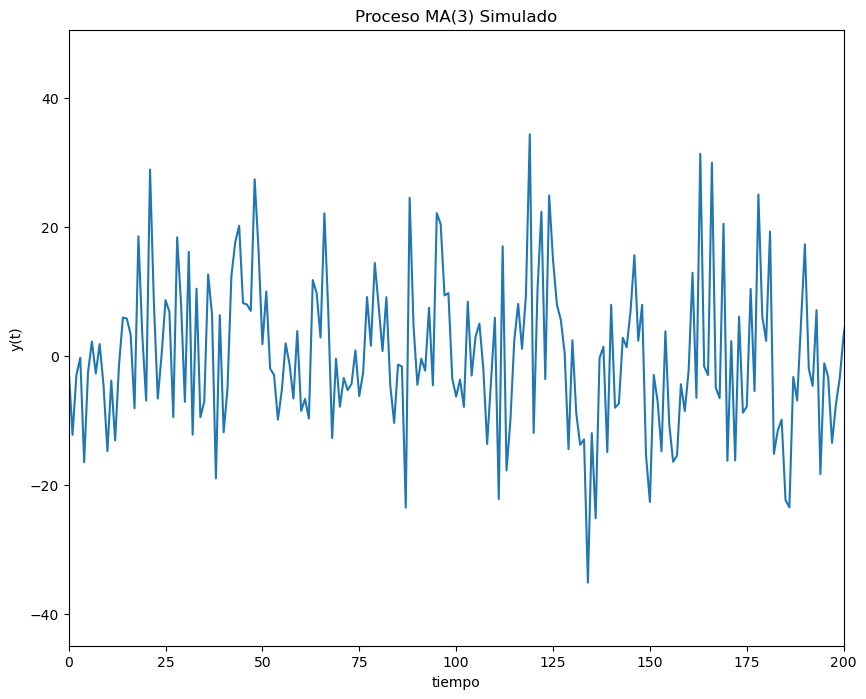

In [67]:
plt.plot(MA3_process)
plt.title('Proceso MA(3) Simulado')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.show()

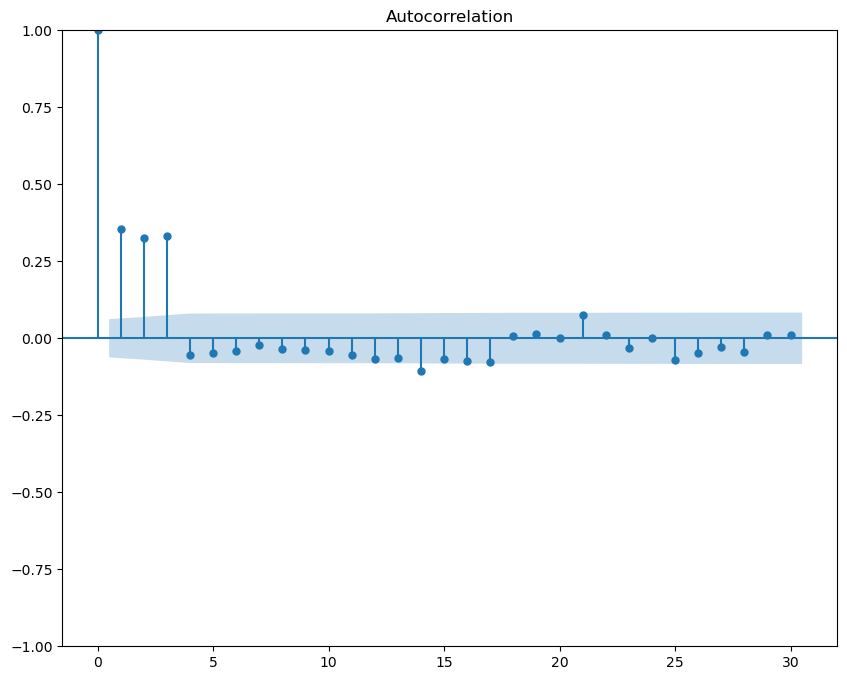

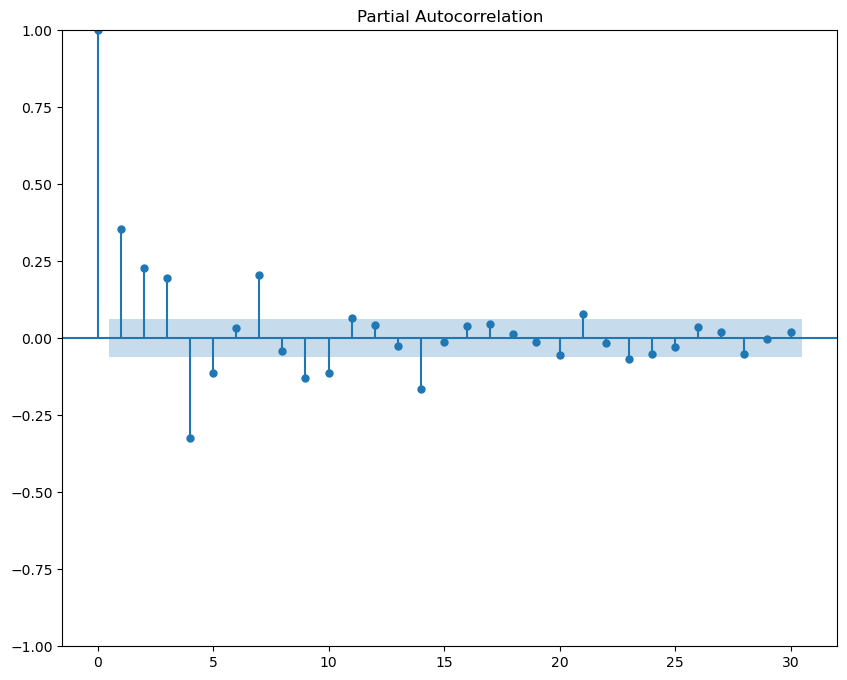

In [68]:
plot_acf(MA3_process);
plot_pacf(MA3_process);

In [69]:
adfuller(MA3_process) # Ho es que la serie no es estacionaria

(-7.0988063841607385,
 4.220409090836602e-10,
 22,
 977,
 {'1%': -3.43706091543889,
  '5%': -2.8645028204932483,
  '10%': -2.568347558984588},
 7268.165642220859)

In [70]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(MA3_process, order=(0, 0, 3))
model_fit = model.fit()

In [71]:
model_fit.resid

array([-2.57667688e+00, -1.17900757e+01,  1.06349871e+00,  2.99461735e+00,
       -1.31034341e+01, -9.68280004e-01,  5.51995001e+00,  2.92722684e+00,
       -1.38111080e+00, -9.24896505e+00, -1.39748653e+01,  4.53923224e+00,
       -2.91095258e+00,  5.41021335e+00,  2.33254666e+00,  3.84885103e+00,
       -2.87867643e+00, -1.12448794e+01,  1.99081141e+01,  4.38642004e+00,
       -1.10029036e+01,  1.64018968e+01,  5.44534174e+00, -9.48027383e+00,
       -1.09574577e+01,  1.20386127e+01,  1.43079375e+01, -1.27018003e+01,
        6.55450309e+00,  2.58852007e+00, -3.37449249e+00,  1.09183216e+01,
       -1.58493619e+01,  1.10374909e+01, -1.25638502e+01,  7.01215480e-01,
        1.06984043e+01,  1.06956500e+01, -2.81310185e+01,  1.25012435e+00,
       -6.16025530e+00,  1.37035638e+01,  1.01962642e+01,  1.16225754e+01,
        2.55914430e+00, -5.37316576e+00,  3.14606089e-02,  7.26631842e+00,
        2.82262196e+01,  4.63018019e+00, -1.84114220e+01, -6.18334136e+00,
        4.96487084e+00,  

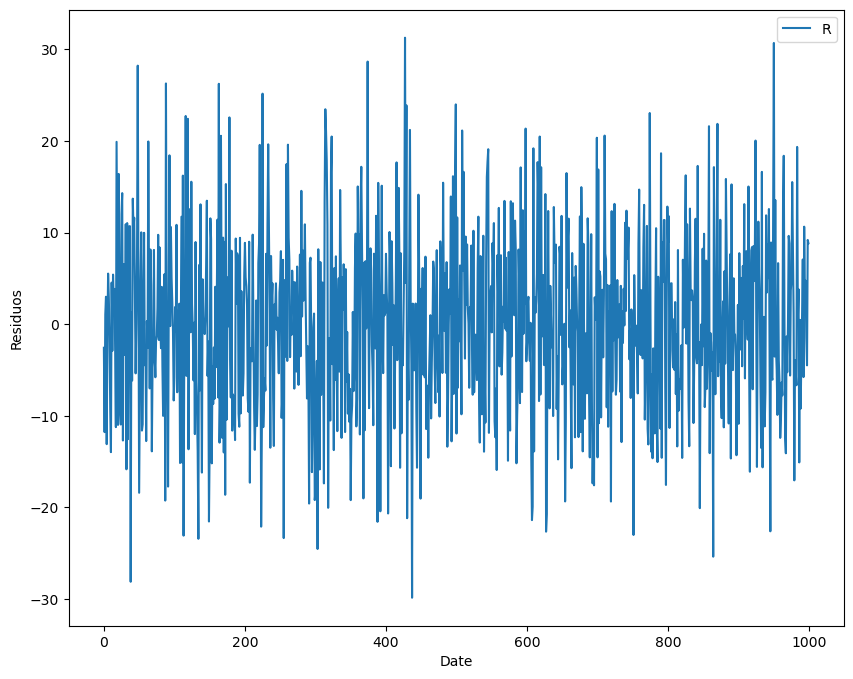

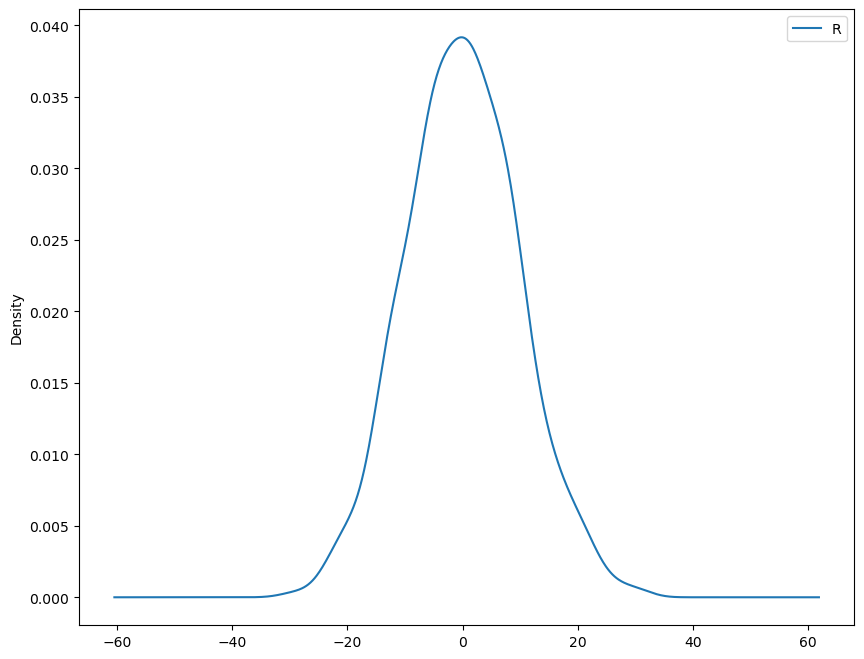

                 0
count  1000.000000
mean      0.005552
std       9.787341
min     -29.872397
25%      -6.605529
50%      -0.077579
75%       6.704752
max      31.277557


In [72]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xlabel('Date')
plt.ylabel('Residuos')
plt.legend("Residuos")
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.legend("Residuos")
plt.show()
# summary stats of residuals
print(residuals.describe())

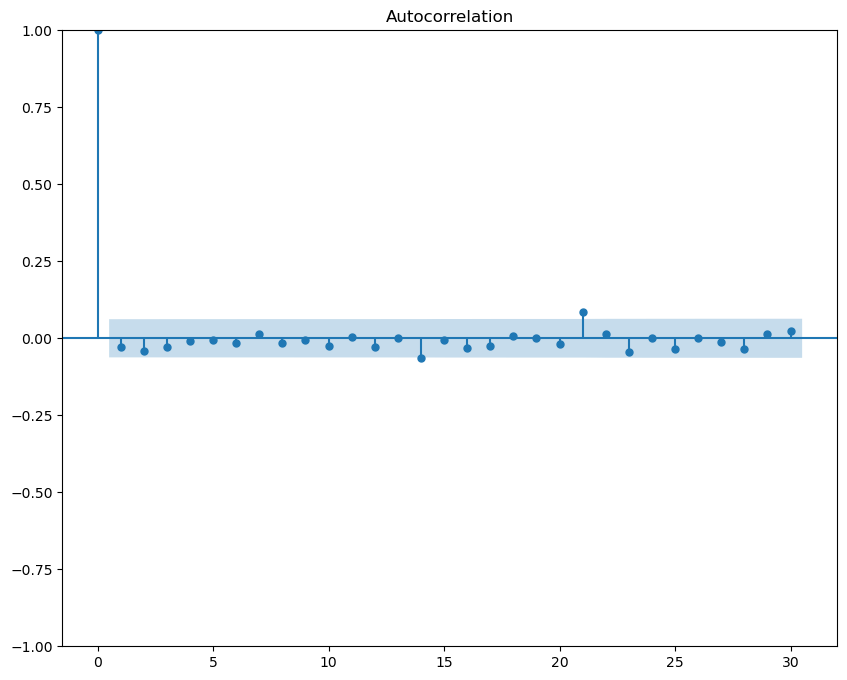

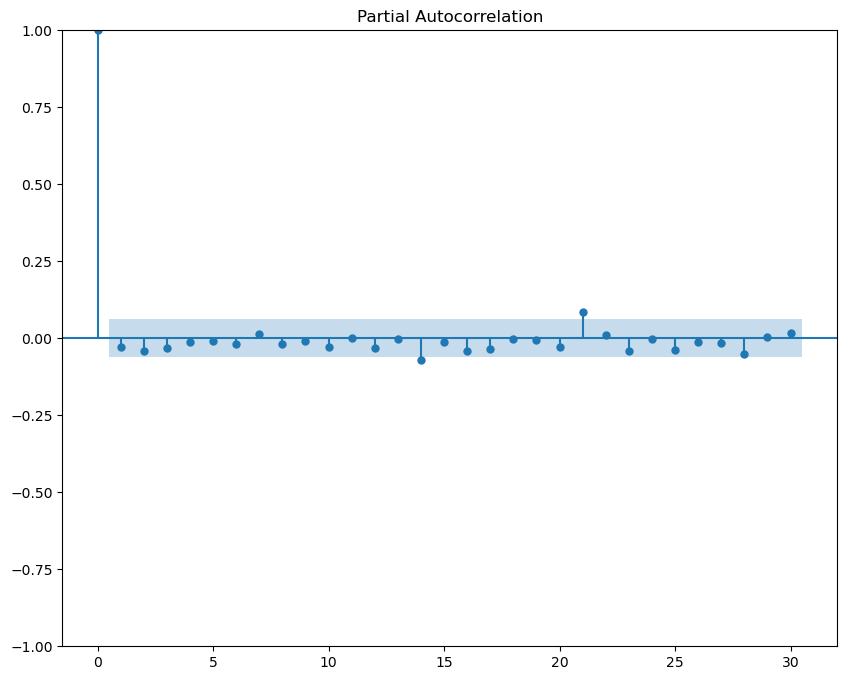

In [73]:
plot_acf(residuals);
plot_pacf(residuals);

In [78]:
data = pd.DataFrame(MA3_process)
data.columns = ["MA3"]
data["Ajustados"] = -model_fit.resid+data['MA3']
data.head()

,MA3,Ajustados
0,-1.938206,0.638471
1,-12.220900,-0.430824
2,-2.936459,-3.999957
3,-0.273264,-3.267881
4,-16.469996,-3.366562


In [85]:
data['MA3'].iloc[-150:]

850    -1.707642
851    10.924518
852    -1.543398
853    -5.232056
854     7.820376
         ...    
995     7.732106
996     9.012618
997     0.306244
998    10.948158
999     8.812626
Name: MA3, Length: 150, dtype: float64

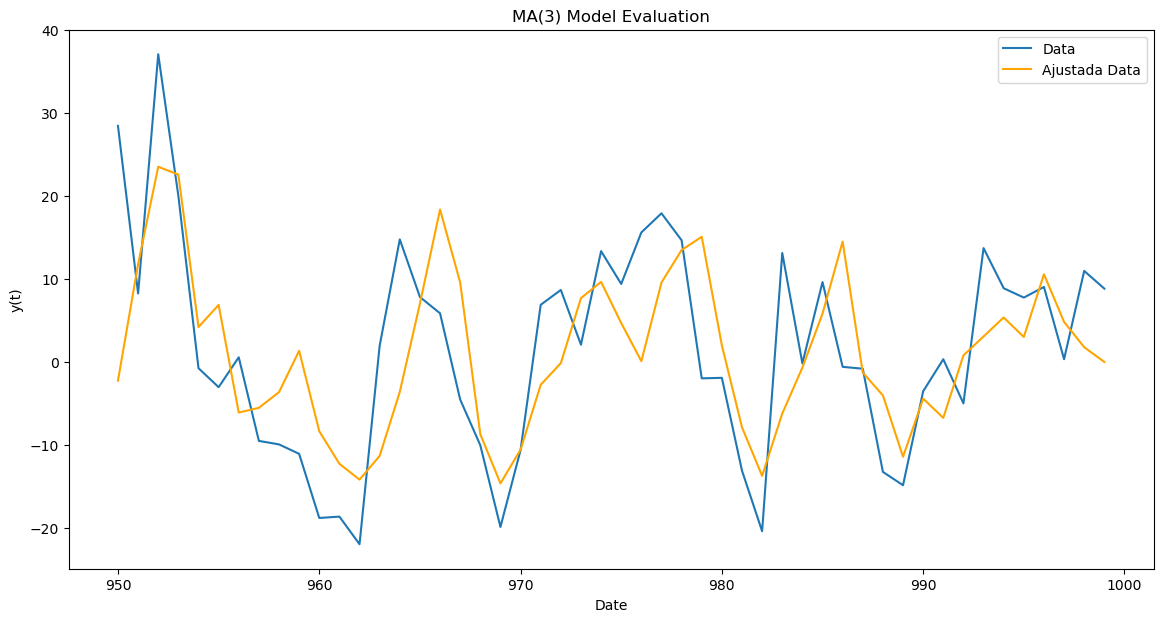

In [88]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(data['MA3'].iloc[-50:], label='Data')
plt.plot(data['Ajustados'].iloc[-50:], label='Ajustada Data', color='orange')
plt.title('MA(3) Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [90]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3700.146
Date:                Sat, 26 Oct 2024   AIC                           7410.293
Time:                        18:42:56   BIC                           7434.832
Sample:                             0   HQIC                          7419.619
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6385      0.748      0.854      0.393      -0.827       2.104
ma.L1          0.2724      0.025     11.112      0.000       0.224       0.321
ma.L2          0.4828      0.020     23.580      0.000       0.443       0.523
ma.L3          0.6491      0.024     26.588      0.000       0.601       0.697
sigma2        95.5947      4.322     22.117      0.000      87.123     104.066
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.36   Prob(JB):                         0.45
Heteroskedasticity (H):               0.83   Skew:                             0.10
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Metodología Train y Test para datos log diferenciales

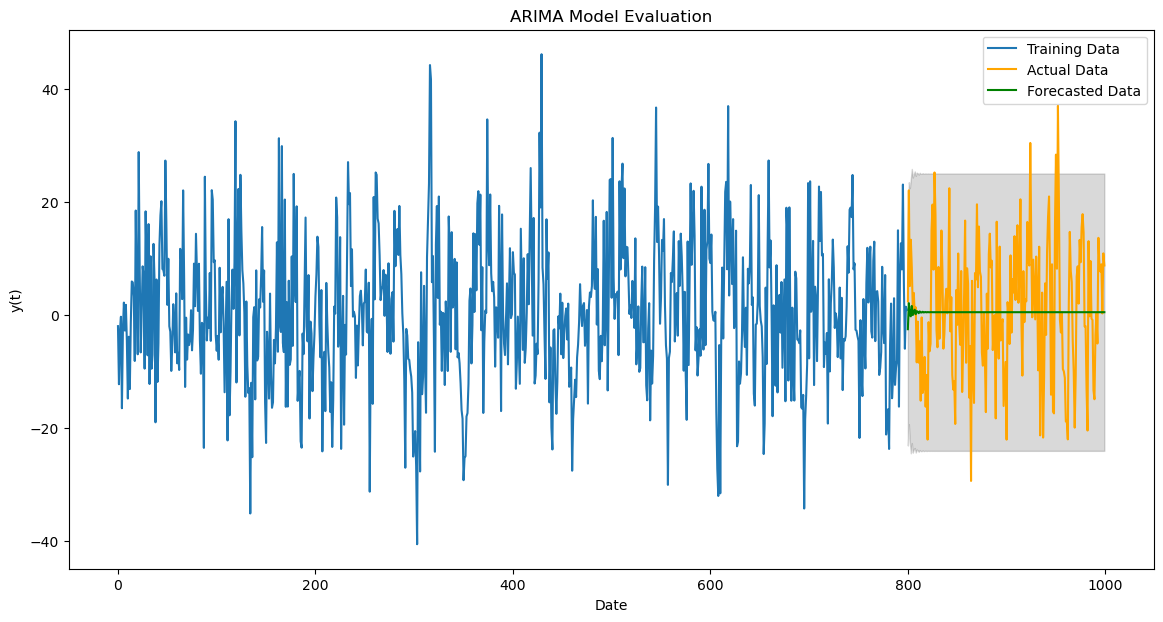

RMSE: 11.571763513746472


In [91]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['MA3'], order=(4, 0, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['MA3'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['MA3'], label='Training Data')
plt.plot(test['MA3'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [116]:
import random
def aleatorio(row):
    value = random.random() 
    return (value*row['lower MA3'] + (1-value)* row['upper MA3'])

MM = test_forecast.conf_int()

# Apply the function to the DataFrame
MM['forecast'] = MM.apply(aleatorio, axis=1)


In [117]:
MM

,lower MA3,upper MA3,forecast
800,-23.065540,18.112696,1.058602
801,-19.287750,23.546221,14.271823
802,-22.389940,22.504154,-4.832311
803,-24.454576,24.063464,-0.847414
804,-22.638709,25.898757,11.301642
...,...,...,...
995,-24.014995,25.080978,21.146585
996,-24.014995,25.080978,-22.858644
997,-24.014995,25.080978,-0.689319
998,-24.014995,25.080978,-10.853964


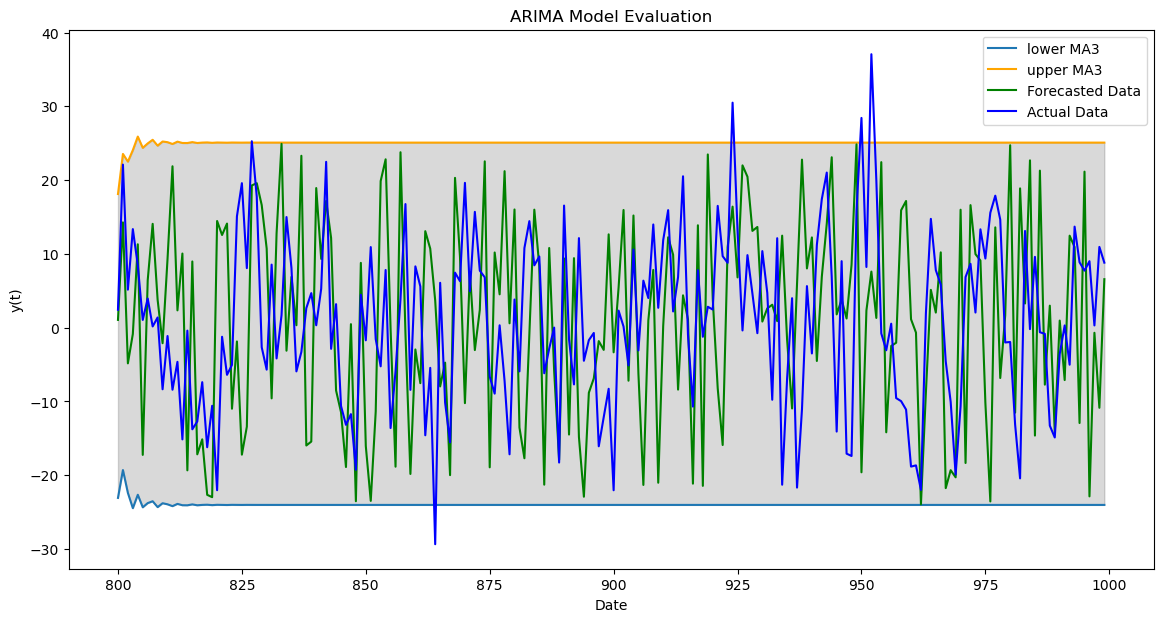

In [119]:
plt.figure(figsize=(14,7))
plt.plot(MM['lower MA3'], label='lower MA3')
plt.plot(MM['upper MA3'], label='upper MA3', color='orange')
plt.plot(MM['forecast'], label='Forecasted Data', color='green')
plt.plot(test['MA3'], label='Actual Data', color='blue')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()